In [1]:
!pip install kaggle

In [2]:
import kagglehub
path = kagglehub.dataset_download("hijest/genre-classification-dataset-imdb")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/genre-classification-dataset-imdb


In [3]:
!pip install nltk

In [4]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
train_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [7]:
train_data.head()

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Nature's Fury: Storm of the Century (2006),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [10]:
train_data.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [11]:
test_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['ID', 'Title', 'Description'], engine='python')

In [12]:
test_data.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [13]:
test_data.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [15]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [16]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [17]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)
train_data['clean_description'] = train_data['Description'].apply(clean_text)
test_data['clean_description'] = test_data['Description'].apply(clean_text)

In [18]:
TfidfVectorizer=TfidfVectorizer(max_features=5000)
X_train=TfidfVectorizer.fit_transform(train_data['clean_description'])

In [19]:
X_test=TfidfVectorizer.transform(test_data['clean_description'])

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(train_data['Genre'])

In [21]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)
train_preds = model.predict(X_train_scaled)
print("Training Accuracy:", accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds, target_names=le.classes_))

Training Accuracy: 0.8871509204264582
               precision    recall  f1-score   support

      action        1.00      1.00      1.00      1315
       adult        1.00      1.00      1.00       590
   adventure        1.00      1.00      1.00       775
   animation        1.00      1.00      1.00       498
   biography        1.00      1.00      1.00       265
      comedy        0.83      0.81      0.82      7447
       crime        1.00      1.00      1.00       505
 documentary        0.89      0.92      0.91     13096
       drama        0.84      0.86      0.85     13613
      family        1.00      1.00      1.00       784
     fantasy        1.00      0.99      1.00       323
   game-show        1.00      1.00      1.00       194
     history        1.00      1.00      1.00       243
      horror        1.00      1.00      1.00      2204
       music        1.00      1.00      1.00       731
     musical        1.00      1.00      1.00       277
     mystery        1.00  

In [22]:
test_preds = model.predict(X_test)
predicted_genres = le.inverse_transform(test_preds)

test_data['Predicted Genre'] = predicted_genres
test_data[['ID', 'Title', 'Predicted Genre']].head()

,ID,Title,Predicted Genre
0,1,Edgar's Lunch (1998),short
1,2,La guerra de papá (1977),short
2,3,Off the Beaten Track (2010),short
3,4,Meu Amigo Hindu (2015),short
4,5,Er nu zhai (1955),short


In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, train_preds))
print(classification_report(y_train, train_preds, target_names=le.classes_))

Training Accuracy: 0.9993913011399269
               precision    recall  f1-score   support

      action        1.00      1.00      1.00      1315
       adult        1.00      1.00      1.00       590
   adventure        1.00      1.00      1.00       775
   animation        1.00      1.00      1.00       498
   biography        1.00      1.00      1.00       265
      comedy        1.00      1.00      1.00      7447
       crime        1.00      1.00      1.00       505
 documentary        1.00      1.00      1.00     13096
       drama        1.00      1.00      1.00     13613
      family        0.99      1.00      1.00       784
     fantasy        0.99      1.00      1.00       323
   game-show        1.00      1.00      1.00       194
     history        1.00      1.00      1.00       243
      horror        1.00      1.00      1.00      2204
       music        1.00      1.00      1.00       731
     musical        1.00      1.00      1.00       277
     mystery        1.00  

In [24]:
feature_names = TfidfVectorizer.get_feature_names_out()
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]
print("Top important words for Random Forest:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]}")

Top important words for Random Forest:
father: 0.0038018351891435575
friend: 0.0038658891094442748
get: 0.004370240831499173
find: 0.004464965913006656
young: 0.004667059670211926
love: 0.005257284647710501
life: 0.005478200583799705
film: 0.006408347993689115
comedy: 0.0074654962741080785
documentary: 0.0203017333211108


In [25]:
genre_counts = train_data['Genre'].value_counts()

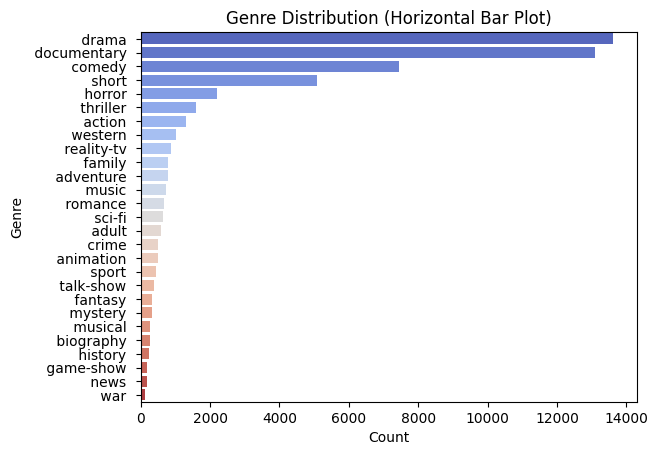

In [26]:
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, palette='coolwarm', dodge=False, legend=False)
plt.title("Genre Distribution (Horizontal Bar Plot)")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [27]:
svc_model = LinearSVC()
svc_model.fit(X_train, y_train)
svc_preds = svc_model.predict(X_train)
print("SVC Accuracy:", accuracy_score(y_train, svc_preds))
print(classification_report(y_train, svc_preds, target_names=le.classes_))

SVC Accuracy: 0.7684361972922124
               precision    recall  f1-score   support

      action        0.80      0.70      0.75      1315
       adult        0.95      0.84      0.89       590
   adventure        0.92      0.66      0.77       775
   animation        0.93      0.73      0.82       498
   biography        0.97      0.29      0.45       265
      comedy        0.72      0.74      0.73      7447
       crime        0.92      0.55      0.69       505
 documentary        0.80      0.90      0.85     13096
       drama        0.69      0.83      0.75     13613
      family        0.91      0.53      0.67       784
     fantasy        0.93      0.68      0.78       323
   game-show        0.97      0.95      0.96       194
     history        0.99      0.40      0.57       243
      horror        0.84      0.86      0.85      2204
       music        0.91      0.85      0.88       731
     musical        0.96      0.66      0.78       277
     mystery        0.95      0

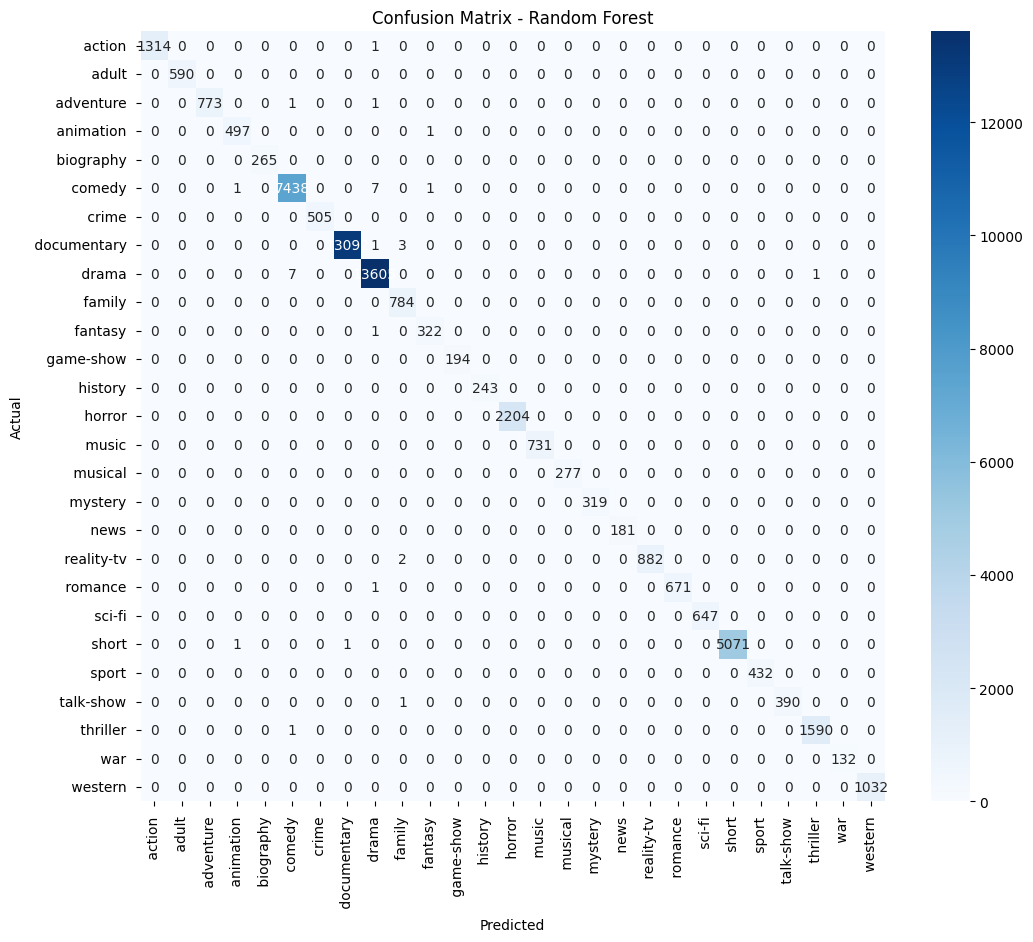

In [28]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train, train_preds)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues", fmt="d", annot=True)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
from sklearn.metrics import precision_recall_fscore_support

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    return {
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': recall,
        'F1-Score': f1
    }

results = []
results.append(evaluate_model("Logistic Regression", y_train, train_preds))
results.append(evaluate_model("Random Forest", y_train, model.predict(X_train)))
results.append(evaluate_model("SVC", y_train, svc_preds))

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.999391   0.999392  0.999391  0.999392
1        Random Forest  0.999391   0.999392  0.999391  0.999392
2                  SVC  0.768436   0.777072  0.768436  0.762244
